## Tema 4. Diseño de Algoritmos de Control.

### Ejemplo diseño de un PID.

**Enunciado**. Sea un sistema cuya respuesta sigue la siguiente ecuación discreta:

$$ y(k) - 0.8 y(k-1) = u(k-2) $$

con período de muestreo $T = 1$ seg.

Obtener el valor de $K_u$ del método de sintonización de Ziegler-Nichols y ajustar las ganancias del regulador PID.

**Solución.** Para obtener $K_u$, realimentamos el sistema y aumentamos la ganancia del lazo $K_u$ hasta que el sistema presente un comportamiento oscilatorio:

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
N = 20
Ku = 0.75
ref = np.ones(N)
y = np.zeros(N)
u = np.zeros(N)
for k in range(2,N):
    y[k] = 0.8*y[k-1] + u[k-2]
    e = ref[k] - y[k]
    u[k] = Ku * e

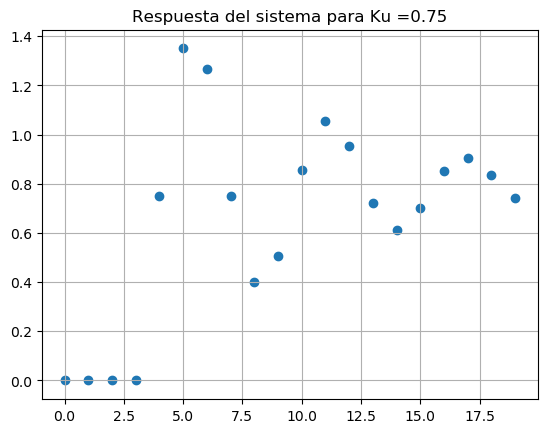

In [10]:
plt.scatter(range(N), y)
plt.title("Respuesta del sistema para Ku =" + str(Ku))
plt.grid()
plt.show()


In [ ]:
Tu = 6 # Periodo de oscilación
Kc = 0.*Ku
Ti = Tu/2
Td = Tu/8